In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
dfF = pd.read_csv('CBS_2021-2023_Full.csv')

In [3]:
dfF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


In [4]:
dfF.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


In [32]:
dfF.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

In [33]:
dfF['started_at'] = pd.to_datetime(dfF['started_at'])
dfF['ended_at'] = pd.to_datetime(dfF['ended_at'])
dfF['Month'] = dfF['started_at'].dt.strftime('%B')
dfF["year"]=dfF["started_at"].dt.year
dfF["start_hour"]=dfF["started_at"].dt.hour
dfF["end_hour"]=dfF["ended_at"].dt.hour
dfF["day"] = dfF["started_at"].dt.day
dfF["day of week"] = dfF["started_at"].dt.strftime("%A")
dfF["date_is_weekend"] = np.where(dfF["day of week"].isin([5, 6]),1,0)

In [6]:
# Remove rows with missing values
dfF_cleaned = dfF.dropna()
dfF_cleaned.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member


In [7]:
dfF_cleaned.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [8]:
dfF_cleaned['started_at'] = pd.to_datetime(dfF_cleaned['started_at'])
dfF_cleaned['ended_at'] = pd.to_datetime(dfF_cleaned['ended_at'])
dfF_cleaned['Month'] = dfF_cleaned['started_at'].dt.strftime('%B')
dfF_cleaned["year"]=dfF_cleaned["started_at"].dt.year
dfF_cleaned["start_hour"]=dfF_cleaned["started_at"].dt.hour
dfF_cleaned["end_hour"]=dfF_cleaned["ended_at"].dt.hour
dfF_cleaned["day"] = dfF_cleaned["started_at"].dt.day
dfF_cleaned["day of week"] = dfF_cleaned["started_at"].dt.strftime("%A")
dfF_cleaned["date_is_weekend"] = np.where(dfF_cleaned["day of week"].isin([5, 6]),1,0)

In [34]:
dfF.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Month', 'year', 'start_hour', 'end_hour', 'day',
       'day of week', 'date_is_weekend'],
      dtype='object')

In [36]:
import pandas as pd

# Assuming you have a column indicating the year (e.g., 'Year')
dfF2021 = dfF[dfF['year'] == 2021]
dfF2022 = dfF[dfF['year'] == 2022]
dfF2023 = dfF[dfF['year'] == 2023]

# Save each dataset to a separate CSV file
dfF2021.to_csv('dfF2021.csv', index=False)
dfF2022.to_csv('dfF2022.csv', index=False)
dfF2023.to_csv('dfF2023.csv', index=False)

In [10]:
# Calculate trip duration in seconds
dfF_cleaned['trip_duration'] = (dfF_cleaned['ended_at'] - dfF_cleaned['started_at']).dt.total_seconds()

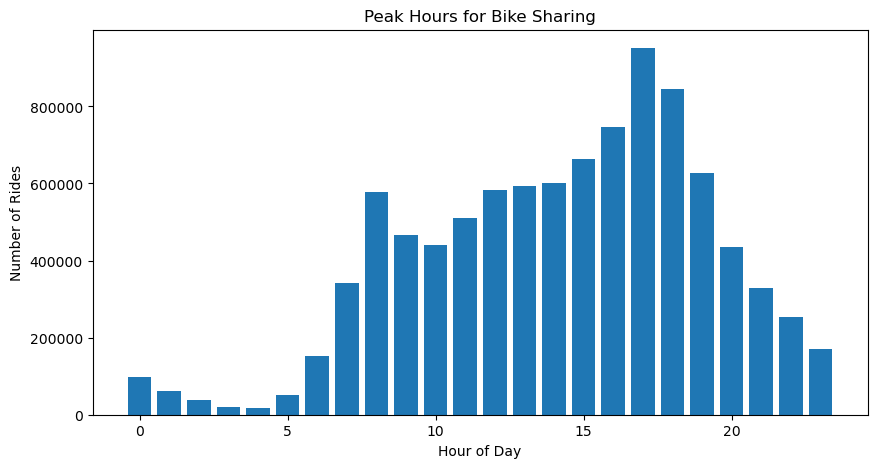

In [11]:
# Peak hours
dfF_cleaned['start_hour'] = dfF_cleaned['started_at'].dt.hour
peak_hours = dfF_cleaned['start_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(peak_hours.index, peak_hours.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Peak Hours for Bike Sharing')
plt.show()


In [13]:
dfF_cleaned['time_of_day'] = dfF_cleaned['start_hour'].apply(lambda value: 'Morning' if value in (4,5,6,7,8,9,10,11)
                                                        else 'Afternoon' if value in (12,13,14,15,16)
                                                        else 'Evening' if value in (17,18,19,20,21) 
                                                        else 'Night')

dfF_cleaned['time_of_day'] = pd.Categorical(dfF_cleaned['time_of_day'],
categories=["Morning","Afternoon","Evening","Night"])

In [14]:
# create trip duration column
dfF_cleaned["trip_duration_min"] = np.round((dfF_cleaned["ended_at"] - dfF_cleaned["started_at"]) / np.timedelta64(1,"m"),0)

In [15]:
print(f"Max trip duration : {dfF_cleaned["trip_duration_min"].max()}")
print(f"Min trip duration : {dfF_cleaned["trip_duration_min"].min()}")

Max trip duration : 54540.0
Min trip duration : -68.0


In [16]:
dfF_cleaned["rideable_type"].value_counts()

rideable_type
classic_bike     7690469
electric_bike    1347887
docked_bike       534336
Name: count, dtype: int64

In [17]:
dfF_cleaned.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Month', 'year', 'start_hour', 'end_hour', 'day',
       'day of week', 'date_is_weekend', 'trip_duration', 'time_of_day',
       'trip_duration_min'],
      dtype='object')

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8),  sharey=True)
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfF_cleaned['year'].unique()):
    year_data = dfF_cleaned[dfF_cleaned['year'] == year]
    sns.barplot(data=year_data, x='member_casual', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

In [18]:

# plt.figure(figsize=(8,7),)
# sns.barplot(x="Weekdays", y="user_count", hue="User_type", data=dfF_cleaned, palette="muted")
# plt.xlabel('Start Station - End Station')
# plt.xticks(rotation=45, ha='right')
# plt.ylabel('Number of Rides')

Text(0, 0.5, 'Number of Rides')

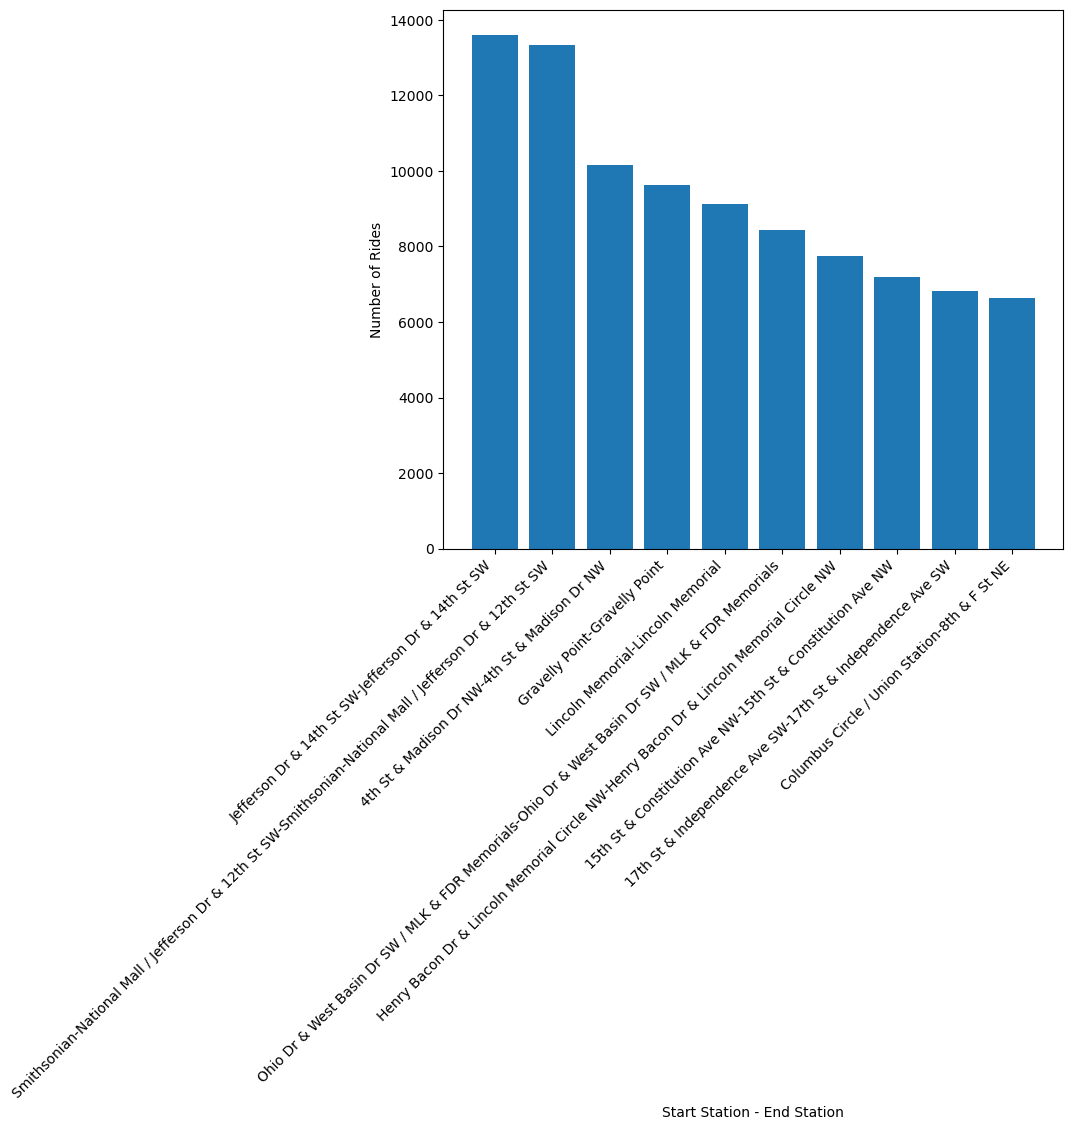

In [19]:
popular_routes = dfF_cleaned.groupby(['start_station_name', 'end_station_name']).size().nlargest(10)

# Extract labels from the MultiIndex
labels = popular_routes.index.get_level_values('start_station_name') + '-' + popular_routes.index.get_level_values('end_station_name')

plt.figure(figsize=(8,7),)
plt.bar(labels, popular_routes.values)  # Use labels as x-axis labels
plt.xlabel('Start Station - End Station')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Rides')

In [20]:
# plt.figure(figsize=(10, 6))

# # Calculate mean 'total_count' for each hour and season
# sns.lineplot(x='Hour', y='Total_rides', data=dfF_cleaned, hue='member_casual', err_style="bars")

# # Add title and labels
# plt.title('Hourly distribution of bike rentals')
# plt.xlabel('Hour')
# plt.ylabel('total_Rides')

# # Show the plot
# plt.show()

In [21]:
dfF_cleaned.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Month', 'year', 'start_hour', 'end_hour', 'day',
       'day of week', 'date_is_weekend', 'trip_duration', 'time_of_day',
       'trip_duration_min'],
      dtype='object')

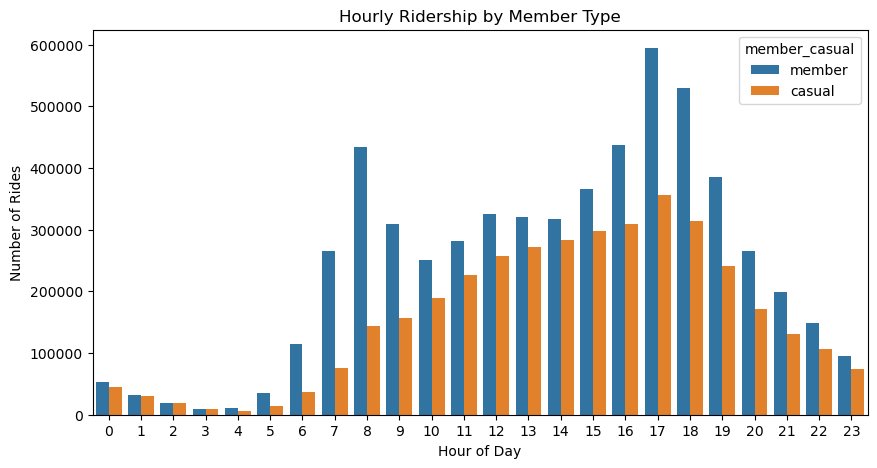

In [22]:
# Hourly ridership comparison
plt.figure(figsize=(10, 5))
sns.countplot(x='start_hour', hue='member_casual', data=dfF_cleaned)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Hourly Ridership by Member Type')
plt.show()


In [24]:
# import pandas as pd

# # Assuming you have a column indicating the year (e.g., 'Year')
# dfF_cleaned_2021 = dfF_cleaned[dfF_cleaned['year'] == 2021]
# dfF_cleaned_2022 = dfF_cleaned[dfF_cleaned['year'] == 2022]
# dfF_cleaned_2023 = dfF_cleaned[dfF_cleaned['year'] == 2023]

# # Save each dataset to a separate CSV file
# dfF_cleaned_2021.to_csv('data_2021.csv', index=False)
# dfF_cleaned_2022.to_csv('data_2022.csv', index=False)
# dfF_cleaned_2023.to_csv('data_2023.csv', index=False)

In [25]:
dfF_cleaned

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,Month,year,start_hour,end_hour,day,day of week,date_is_weekend,trip_duration,time_of_day,trip_duration_min
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,January,2021,0,0,1,Friday,0,1520.0,Night,25.0
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,January,2021,0,0,1,Friday,0,853.0,Night,14.0
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,January,2021,0,0,1,Friday,0,335.0,Night,6.0
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,January,2021,0,0,1,Friday,0,194.0,Night,3.0
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,...,January,2021,0,0,1,Friday,0,1042.0,Night,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693991,5FFF7B5DE01103EE,classic_bike,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884095,-76.995234,...,December,2023,23,0,31,Sunday,0,269.0,Night,4.0
10693992,1E69FA72F720F2E7,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,...,December,2023,23,0,31,Sunday,0,863.0,Night,14.0
10693993,BA9E9FDBFAFDE618,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,...,December,2023,23,0,31,Sunday,0,241.0,Night,4.0
10693994,F3B6C6BFB1F738D0,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,...,December,2023,23,2,31,Sunday,0,7784.0,Night,130.0


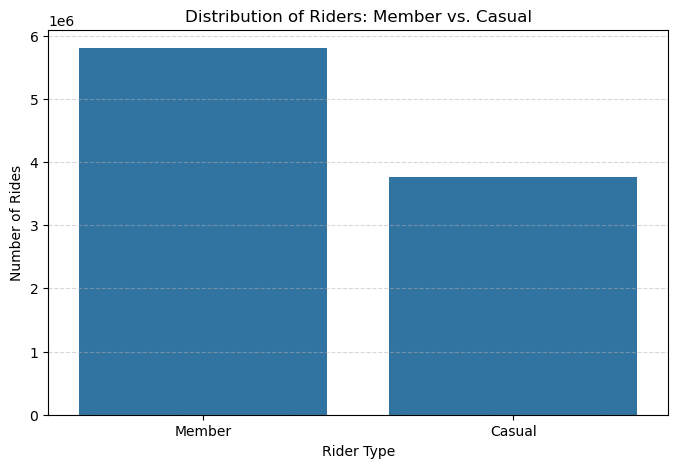

In [27]:
plt.figure(figsize=(8, 5)) 

# Create the countplot
sns.countplot(x='member_casual', data=dfF_cleaned)

# Set title and labels
plt.title('Distribution of Riders: Member vs. Casual')
plt.xlabel('Rider Type')
plt.ylabel('Number of Rides')

# Customize appearance (optional)
plt.xticks(ticks=[0, 1], labels=['Member','Casual']) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [26]:
# plt.figure(figsize=(6, 5))
# sns.histplot(dfF_cleaned['member_casual'], shrink=0.7)
# plt.xlabel('Member Type')
# plt.ylabel('Trip Duration (seconds)')
# plt.title('Trip Duration by Member Type')
# plt.show()


In [28]:
# Analyze station congestion
station_usage = pd.concat([dfF_cleaned['start_station_name'], dfF_cleaned['end_station_name']])
station_counts = station_usage.value_counts()

In [29]:
# Identify stations with high usage
high_usage_stations = station_counts[station_counts > 1000]  # Adjust threshold as needed
print("Stations with High Usage:\n", high_usage_stations)


Stations with High Usage:
 New Hampshire Ave & T St NW          203059
Columbus Circle / Union Station      202994
15th & P St NW                       192428
Lincoln Memorial                     192106
Jefferson Dr & 14th St SW            179548
                                      ...  
Hartland Rd & Harte Pl                 1042
Stanton Square SE                      1033
Kenilworth Terrace & Hayes St. NE      1019
Piccard & W Gude Dr                    1013
Briggs Chaney Park & Ride              1001
Name: count, Length: 698, dtype: int64


In [30]:
high_usage_stations.head(10)

New Hampshire Ave & T St NW                              203059
Columbus Circle / Union Station                          202994
15th & P St NW                                           192428
Lincoln Memorial                                         192106
Jefferson Dr & 14th St SW                                179548
1st & M St NE                                            172635
4th St & Madison Dr NW                                   166838
Smithsonian-National Mall / Jefferson Dr & 12th St SW    155349
5th & K St NW                                            154566
Henry Bacon Dr & Lincoln Memorial Circle NW              152741
Name: count, dtype: int64

KeyboardInterrupt: 

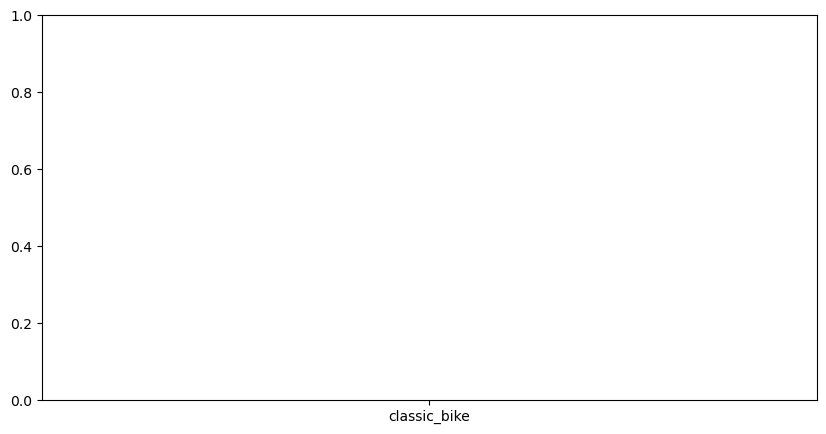

In [31]:
# Trip duration vs. distance
# Assuming you have calculated distance in a separate step
plt.figure(figsize=(10, 5))
sns.barplot(x='rideable_type', y='trip_duration', hue='rideable_type', data=dfF_cleaned)
plt.xlabel('Distance')
plt.ylabel('Trip Duration (seconds)')
plt.title('Trip Duration vs. Distance')
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfF_cleaned, x='Year', y='Total_rides', ax=ax)
ax.set(title='Count of bikes during different years')

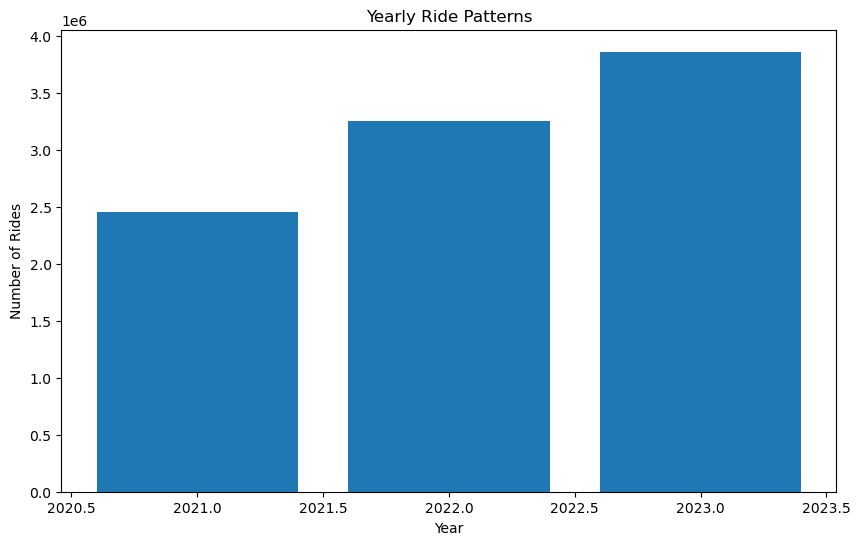

In [36]:
# # Yearly Ride Patterns (if available)
# if 'year' in dfF_cleaned.columns:
#     yearly_rides = dfF_cleaned.groupby('year')['ride_id'].count()

#     plt.figure(figsize=(10, 6))
#     plt.bar(yearly_rides, yearly_rides.values)
#     plt.xlabel("Year")
#     plt.ylabel("Number of Rides")
#     plt.title("Yearly Ride Patterns")
#     plt.show()

In [41]:
# import pandas as pd

# # Assuming your DataFrame is named 'df' and the column is 'rideable_type'

# # Create separate DataFrames for each rideable_type
# classic_bike = dfF_cleaned[dfF_cleaned['rideable_type'] == 'classic_bike']
# electric_bike = dfF_cleaned[dfF_cleaned['rideable_type'] == 'electric_bike']
# docked_bike = dfF_cleaned[dfF_cleaned['rideable_type'] == 'docked_bike']

# # Print the shapes of the resulting DataFrames (optional)
# # print(f"Classic Bike DataFrame shape: {classic_bike.shape}")
# # print(f"Electric Bike DataFrame shape: {electric_bike.shape}")
# # print(f"Docked Bike DataFrame shape: {docked_bike.shape}")

# # Save each dataset to a separate CSV file
# classic_bike.to_csv('classicbike.csv', index=False)
# electric_bike.to_csv('electricbike.csv', index=False)
# docked_bike.to_csv('dockedbike.csv', index=False)


In [39]:
dfF_cleaned.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'month', 'year', 'start_hour', 'end_hour', 'day',
       'day of week', 'date_is_weekend', 'trip_duration', 'time_of_day',
       'trip_duration_min', 'Month'],
      dtype='object')

In [40]:
dfF_cleaned["rideable_type"].value_counts()

rideable_type
classic_bike     7690469
electric_bike    1347887
docked_bike       534336
Name: count, dtype: int64